In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [4]:
X,y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)

X_df = pd.DataFrame(X, columns=['weight','height'])
y_df = pd.DataFrame(y, columns=['class'])
df = pd.concat([X_df, y_df], axis=1)

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}
df['class'] = df['class'].map(target_map)

df.head()

,weight,height,class
0,-7.253467,-7.947597,fish
1,-12.447536,-5.822616,bird
2,-5.973586,-3.275877,cat
3,-5.310976,-2.953204,cat
4,-1.860408,1.477063,dog


<Axes: xlabel='weight', ylabel='height'>

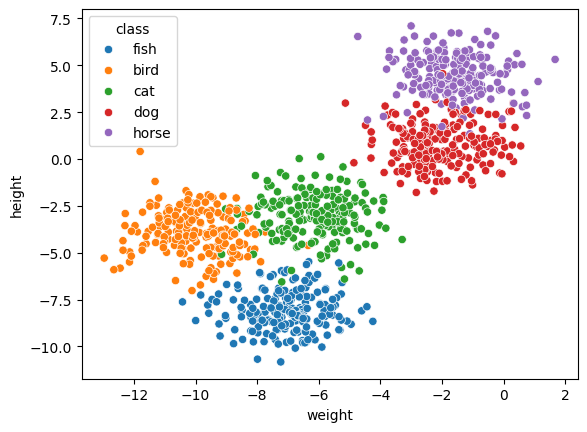

In [6]:
plt.figure()
sns.scatterplot(x='weight', y='height', hue='class', data=df)

In [10]:
class_names, y = np.unique(df["class"], return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [12]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       ...,
       [ 1.18655688,  1.3698714 ],
       [-0.58683309, -1.43575628],
       [-1.09685279, -0.48430291]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# add hidden layer
model.add(Dense(100, input_dim=2, activation='relu'))
# add output layer
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20,validation_split=0.25, verbose=0)

# evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: %.3f' % loss)
print('Test accuracy: %.3f' % acc)



2023-10-23 19:18:58.380770: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Test loss: 0.090
Test accuracy: 0.972


In [49]:
# predict model
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_pred[:5].round(2))
print(y_pred[:5].argmax(axis=1))

8/8 [==============================] - 0s 374us/step
[[2.45341258e-09 1.57386293e-09 1.57361792e-03 2.03854694e-11
  9.98426437e-01]
 [2.67870170e-10 1.60479421e-10 3.00055789e-03 1.16700104e-11
  9.96999502e-01]
 [2.76116971e-05 4.11013840e-03 9.86446977e-01 2.18880132e-06
  9.41296201e-03]
 [2.26779957e-03 9.51151252e-01 1.54466310e-03 4.50205393e-02
  1.57706090e-05]
 [9.72793757e-08 3.65766624e-07 7.49631748e-02 3.28558425e-09
  9.25036371e-01]]
[[0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   1.  ]
 [0.   0.   0.99 0.   0.01]
 [0.   0.95 0.   0.05 0.  ]
 [0.   0.   0.07 0.   0.93]]
[4 4 2 1 4]


In [36]:
# create Class One-Hot Encoding to int
class Onehot2class():
    def __init__(self, model):
        self.model = model
    
    def predict(self, X):
        y_pred = self.model.predict(X)
        return y_pred.argmax(axis=1)

model_no_ohe = Onehot2class(model)


9600/9600 [==============================] - 2s 195us/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


([], [])

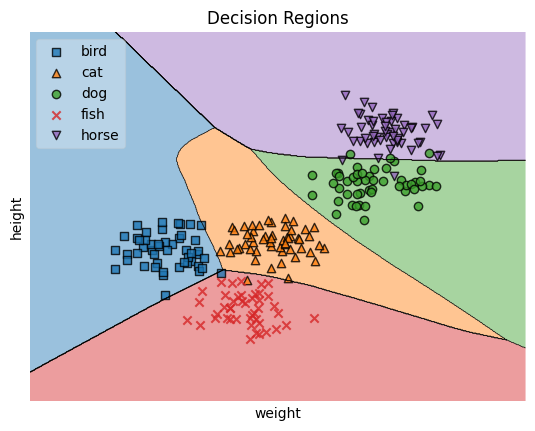

In [48]:
# create regions
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X=X_test, y=y_test, clf=model_no_ohe, legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, 
           framealpha=0.3, scatterpoints=1)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Decision Regions')
plt.xticks([])
plt.yticks([])